In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Tarefa 4 - Decision Trees, Random Forest and K-Means
Fourth assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This tarefa provides an exciting opportunity for students to put their knowledge acquired in class into practice, using decision trees and random forests to solve a real-world problem in classification and delve into the world of unsupervised learning by implementing the K-means algorithm. Students will also get used to generating important plots during training to analyse the models' behaviour. 

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).

## Notebook Overview:

1. [Decision Trees](#Decision_Trees) (30%)
2. [Random Forest](#Random_Forest) (30%)
3. [K-Means](#K-Means) (30%)

### Decision_Trees
## Part 1 - Decision Trees for Classification (value: 30%)

In [181]:
# load the data
# I've used a fraction of the sample because the runtime of the code was very very long
# The csv i've used was "ddi_dt_sample2.csv" with 132 datapoints instead of 7 hundred

ddi_df = pd.read_csv('data/ddi_dt_sample.csv')
#ddi_df = pd.read_csv('data/ddi_dt_sample2.csv')

In [182]:
# inspect the data
ddi_df

,drug1,drug2,ddi,pca_max_0,pca_max_1,pca_max_2,pca_max_3,pca_max_4,pca_max_5,pca_max_6,...,pca_min_17,pca_min_18,pca_min_19,pca_min_20,pca_min_21,pca_min_22,pca_min_23,pca_min_24,pca_min_25,pca_min_26
0,CID000002725,CID000013342,0.0,-2.383210,-0.066904,0.051153,0.058145,0.398508,0.215271,-0.267814,...,-0.366350,-1.091191,-1.021989,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.091330,-0.195522
1,CID000002802,CID000013342,0.0,-2.554958,-0.066904,0.053715,0.058145,0.398508,0.131852,-0.267814,...,-0.366350,0.106596,0.010149,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
2,CID000002083,CID000013342,0.0,9.908402,-0.066904,0.122384,0.058145,0.398508,0.098734,0.041276,...,-0.366350,0.102901,0.010149,-0.088365,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
3,CID000004034,CID000013342,0.0,-2.547375,-0.066904,0.051884,0.058145,0.398508,0.203962,-0.267814,...,-0.366350,-1.011102,-0.944133,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
4,CID000003899,CID000013342,0.0,-2.554958,-0.066904,0.051083,0.058145,0.398508,0.138126,-0.267814,...,-0.366350,0.075010,0.010149,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,CID000003899,CID000072054,0.0,-2.547375,-0.487888,0.051884,-0.047719,0.078300,0.203962,-0.302027,...,-0.045601,-1.011102,-0.944133,-0.056071,-0.115154,0.028694,-0.034424,0.033387,-0.044441,-0.015226
128,CID000002764,CID000072054,1.0,9.908203,-0.468728,0.118230,0.027609,0.136480,0.203962,0.042100,...,-0.149787,-1.011102,-0.944133,-0.085158,-0.091387,0.001591,-0.010859,0.021132,-0.022179,-0.021279
129,CID000004585,CID000072054,1.0,10.134492,-0.425446,0.051884,-0.079217,0.177842,0.203962,-0.236235,...,0.500591,-1.387510,-1.321076,-2.198217,-0.091387,-0.464357,-0.317448,0.033387,-0.042333,0.090798
130,CID000004171,CID000072054,1.0,9.912072,-0.471327,0.113655,-0.001600,0.139044,0.203962,0.056079,...,-0.140383,-1.011102,-0.944133,-0.083441,-0.091387,0.001284,-0.010859,0.020544,-0.022179,-0.048666


As you can observe, the first 2 columns represent the IDs of the drugs in each combination. The 3rd column represents the binary label indicating if the pair causes an adverse interaction or not. The remaining 54 columns are the features based on the PCA representations of individual drug targets. 

In [183]:
# Auxiliar functions
def test_split(index, value, ddi_df):
    # Split dataset based on a feature index and value
    left, right = list(), list()
    for row in ddi_df.index:
        if ddi_df.iloc[row, index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

def gini_index(groups, class_values, ddi_df):
    # Calculate the Gini index for a split dataset
    gini = 0.0
    total_size = sum([len(group) for group in groups])
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        for class_val in class_values:
            p = [ddi_df.iloc[row, 2] for row in group].count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / total_size)
    return gini

def get_split(ddi_df):
    # Select the best split point for a dataset
    
    # Get unique class values (column 3 in our dataset, so it will be our target)
    class_values = list(set(ddi_df.iloc[:, 2]))

    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    # Index iteration start at 3 (column 4) to skip IDs and target
    for index in range(3, len(ddi_df.columns)):
        for row in ddi_df.index:
            groups = test_split(index, ddi_df.iloc[row, index], ddi_df)
            gini = gini_index(groups, class_values, ddi_df)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, ddi_df.iloc[row, index], gini, groups
    return {'index': b_index, 'value': b_value, 'groups': b_groups}

def to_terminal(group, ddi_df):
    # Create a terminal node value based on majority class
    outcomes = [ddi_df.iloc[row, 2] for row in group]  # Use the third column as target
    return max(set(outcomes), key=outcomes.count)

def split(node, max_depth, min_size, depth, ddi_df):
    # Recursively split a node until terminal conditions are met
    left, right = node['groups']
    del(node['groups'])
    
    # Check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right, ddi_df)
        return
    
    # Check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left, ddi_df), to_terminal(right, ddi_df)
        return
    
    # Process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left, ddi_df)
    else:
        left_ddi_df = ddi_df.iloc[left, :].reset_index(drop=True)
        node['left'] = get_split(left_ddi_df)
        split(node['left'], max_depth, min_size, depth+1, left_ddi_df)
    
    # Process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right, ddi_df)
    else:
        right_ddi_df = ddi_df.iloc[right, :].reset_index(drop=True)
        node['right'] = get_split(right_ddi_df)
        split(node['right'], max_depth, min_size, depth+1, right_ddi_df)

In [184]:
#Building tree and making predictions
def build_tree(train, max_depth, min_size):
    # Build a decision tree recursively using the training dataset
    # Get the best split for the root node
    root = get_split(train)
    # Recursively split all the branchs the tree
    split(root, max_depth, min_size, 1, train)
    return root  

def predict(node, row):
    # Predict the class label for a given row using the decision tree
    if row[node['index']] < node['value']:
        # Traverse left subtree
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        # Traverse right subtree
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

def decision_tree(train, test, max_depth, min_size):
    # Build the decision tree and make predictions
    tree = build_tree(train, max_depth, min_size)
    predictions = []
    for i in range(len(test)):
        # Predict the class label
        prediction = predict(tree, test.iloc[i, :])  
        predictions.append(prediction)
    return predictions

In [185]:
# Dividir o ddi_df em treino e teste (exemplo)
train_size = int(len(ddi_df) * 0.7)
train, test = ddi_df.iloc[:train_size], ddi_df.iloc[train_size:]

#I really don't know why but using train_test_split i had an index problem, so i've done a simple split to use as a train test
#train, test = train_test_split(ddi_df, test_size=0.3, random_state=13)

# Tree parameters
max_depth = 5
min_size = 1

# Build the tree
tree = build_tree(train, max_depth, min_size)

# Doing Predictions
predictions = decision_tree(train, test, max_depth, min_size)

In [186]:
def calculate_accuracy(predictions, actual):
    correct = sum(1 for p, a in zip(predictions, actual) if p == a)
    return correct / len(actual) * 100.0

def calculate_precision(predictions, actual):
    true_positive = sum(1 for p, a in zip(predictions, actual) if p == a == 1)
    predicted_positive = sum(1 for p in predictions if p == 1)
    return true_positive / predicted_positive * 100.0 if predicted_positive != 0 else 0

# Calculating accuracy and precision of the predictions
actual = test.iloc[:, 2].tolist()
accuracy = calculate_accuracy(predictions, actual)
precision = calculate_precision(predictions, actual)

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")

Accuracy: 80.00%
Precision: 91.67%


In [ ]:
#Results:
#Accuracy: 80.00%
#Precision: 91.67%

## Random_Forest
## Part 2 - Random Forest for Classification Networks (value: 30%)



In [187]:
# random forest version of auxiliar functions

def test_split_forest(index, value, ddi_df):
    # Split dataset based on a feature index and value
    left, right = list(), list()
    for row in ddi_df.index:
        if ddi_df.iloc[row, index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

def gini_index(groups, class_values, ddi_df):
    # Calculate the Gini index for a split dataset
    gini = 0.0
    total_size = sum([len(group) for group in groups])
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        for class_val in class_values:
            p = [ddi_df.iloc[row, 2] for row in group].count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / total_size)
    return gini

def get_split_forest(ddi_df, n_features):
    # Select the best split point for a dataset using a random subset of features
    class_values = list(set(ddi_df.iloc[:, 2]))  # Get unique class values
    features = list()
    while len(features) < n_features:
        index = np.random.randint(3, len(ddi_df.columns))
        if index not in features:
            features.append(index)
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in features:
        for row in ddi_df.index:
            groups = test_split_forest(index, ddi_df.iloc[row, index], ddi_df)
            gini = gini_index(groups, class_values, ddi_df)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, ddi_df.iloc[row, index], gini, groups
    return {'index': b_index, 'value': b_value, 'groups': b_groups}

def split_forest(node, max_depth, min_size, depth, ddi_df, n_features):
    # Recursively split a node until terminal conditions are met
    left, right = node['groups']
    del(node['groups'])
    
    # Check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right, ddi_df)
        return
    
    # Check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left, ddi_df), to_terminal(right, ddi_df)
        return
    
    # Process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left, ddi_df)
    else:
        left_ddi_df = ddi_df.iloc[left, :].reset_index(drop=True)
        node['left'] = get_split_forest(left_ddi_df, n_features)
        split_forest(node['left'], max_depth, min_size, depth+1, left_ddi_df, n_features)
    
    # Process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right, ddi_df)
    else:
        right_ddi_df = ddi_df.iloc[right, :].reset_index(drop=True)
        node['right'] = get_split_forest(right_ddi_df, n_features)
        split_forest(node['right'], max_depth, min_size, depth+1, right_ddi_df, n_features)

In [188]:
#Building a random forest model and making predictions
def build_tree_forest(train, max_depth, min_size, n_features):
    # Build a decision tree
    root = get_split_forest(train, n_features)
    split_forest(root, max_depth, min_size, 1, train, n_features)
    return root

def subsample(ddi_df, ratio):
    # Create a random subsample from the dataset with replacement
    sample = list()
    n_sample = round(len(ddi_df) * ratio)
    while len(sample) < n_sample:
        index = np.random.randint(len(ddi_df))
        sample.append(ddi_df.iloc[index])
    return pd.DataFrame(sample)

def bagging_predict(trees, row):
    # Make a prediction with a list of bagged trees
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)

def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    # Build and evaluate a random forest model
    trees = list()
    for _ in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree_forest(sample, max_depth, min_size, n_features)
        trees.append(tree)
    predictions = [bagging_predict(trees, test.iloc[i, :]) for i in range(len(test))]
    return predictions

In [189]:
# Random forest parameters
max_depth = 5
min_size = 1
sample_size = 1.0
n_trees = 5
n_features = int(np.sqrt(len(ddi_df.columns) - 3))

# Build the forest
predictions = random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features)

# Calculating accuracy and precision of the predictions
actual = test.iloc[:, 2].tolist()
accuracy = calculate_accuracy(predictions, actual)
precision = calculate_precision(predictions, actual)

print(f"Acurácia: {accuracy:.2f}%")
print(f"Precisão: {precision:.2f}%")

Acurácia: 57.50%
Precisão: 92.31%


In [ ]:
#Results:
#Accuracy: 57.50%
#Precision: 92.31%

## K-Means
## Part 3 – Clustering with K-means (value: 40%)

In this exercise, you will explore clustering by implementing the K-means algorithm. You will write code to perform K-means clustering while visualizing the movement of the centroids at each iteration. 

To complete this exercise, you will write code to implement K-means for clustering: 

1. Dataset Preparation: Run the cells provided in the notebook that generate the artificial data points for this exercise.
2. K-means Clustering:
	- Initialize K cluster centroids by selecting K points from your dataset at random.
	- Implement a loop to perform the following steps until convergence (or until a specified maximum number of iterations is reached, e.g., 150):
        - Assign each data point to the nearest centroid (you will have to calculate the Euclidean distance between the data point and each centroid).
        - Update each centroid by moving it to the mean of all data points assigned to it.
        - Check for convergence by comparing the new centroids with the previous centroids. If the difference is smaller than an $\epsilon=1^{-4}$, exit the loop.
3. Centroid Movement Visualization:
	- At 5 different moments during training, plot a figure showing the centroids and the points. Figure 1 should show the situation at the beginning, before learning. Figure 5 should show the situation at the end of the learning. The remaining Figures 2-4 should show intermediary situations.
	- For each figure, each centroid will be represented by a large black cross and each cluster with a different colour, the points must be coloured according to their respective cluster.
4. Sum of squared distances:
	- Along with plotting the centroid movement, calculate the sum of squared distances at each iteration as follows:
        - $\sum_{j=1}^K \sum_{n \in S_j}d(x_n,\mu_j )^2$, where $K$ is the number of clusters, $x_n$ represents the $n^{th}$ datapoint, $n \in S_j$ indicates a set of points that belong to cluster $S_j$, $\mu_j$ is the mean of the datapoints in $S_j$ and $d(x_n,\mu_j)$ indicates the Euclidean distance between $x_n$ and $\mu_j$.
	- Make a plot of the sum of squared distances at each iteration. 


In [190]:
# Generate artificial data points
np.random.seed(13)
num_samples = 200
num_features = 2
X = np.random.randn(num_samples, num_features) * 1.5 + np.array([[2, 2]])
X = np.concatenate([X, np.random.randn(num_samples, num_features) * 3 + np.array([[-5, -5]])])
X = np.concatenate([X, np.random.randn(num_samples, num_features) * 2 + np.array([[7, -5]])])

In [191]:
## your code goes here:
#Generating random centroids
def initialize_centroids(data, K):
    np.random.seed(13)
    centroids = data[np.random.choice(range(len(data)), K, replace=False)]
    return centroids

# Assign dots to the nearest centroid
def assign_points(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    cluster_labels = np.argmin(distances, axis=1)
    return cluster_labels

# Update centroid moving them to the mean
def update_centroids(data, cluster_labels, K):
    new_centroids = np.array([data[cluster_labels == k].mean(axis=0) for k in range(K)])
    return new_centroids

# Sum of squared distances
def calculate_sum_distances_squared(data, centroids, cluster_labels, K):
    sum_distance_squared = 0
    for k in range(K):
        cluster_points = data[cluster_labels == k]
        centroid = centroids[k]
        distance_squared = np.sum(np.linalg.norm(cluster_points - centroid, axis=1) ** 2)
        sum_distance_squared += distance_squared
    return sum_distance_squared

In [192]:
# Function to visualize clusters and centroids
def plot_clusters(data, centroids, cluster_labels, K, i):
    colors = ['cyan', 'magenta', 'yellow']
    plt.figure()
    # Plot each cluster
    for k in range(K):
        cluster_points = data[cluster_labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], label=f'Cluster {k+1}')
    
    title = f"{i}th iteration."
    plt.title(title)
    
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='k', s=100, label='Centroids')
    plt.legend()

# Function to plot the graph of sum of squared distances in each iteration
def plot_sum_distances_squared(sum_distances_squared):
    # Create a new figure
    plt.figure()
    # Plot the sum of squared distances
    plt.plot(range(len(sum_distances_squared)), sum_distances_squared, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Sum of squared distances')
    plt.title('Sum of squared distances by iteration')

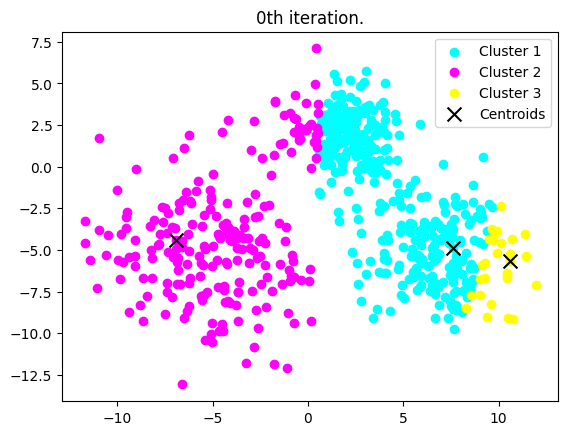

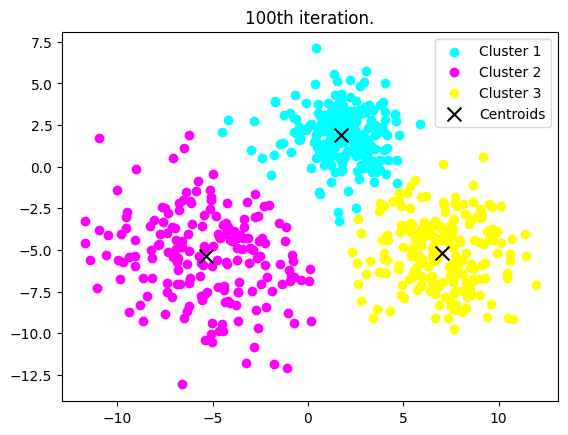

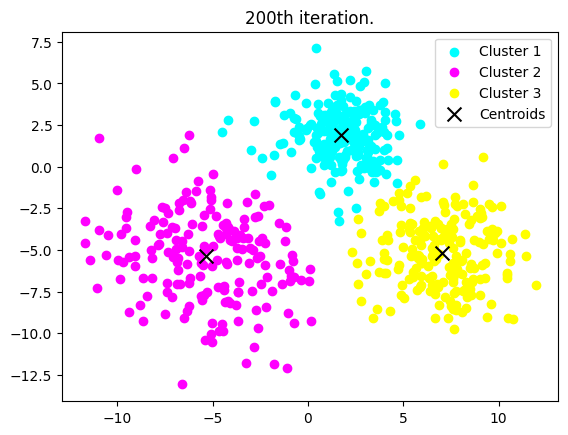

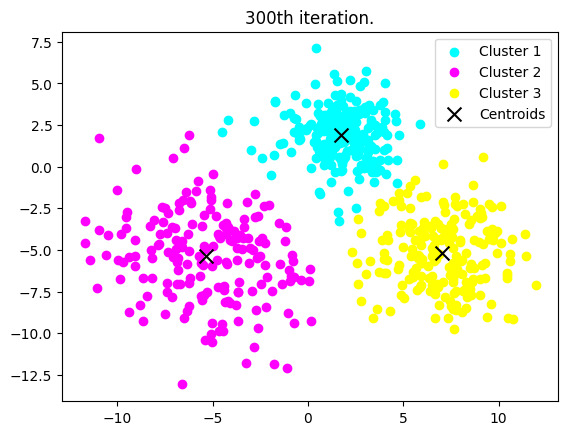

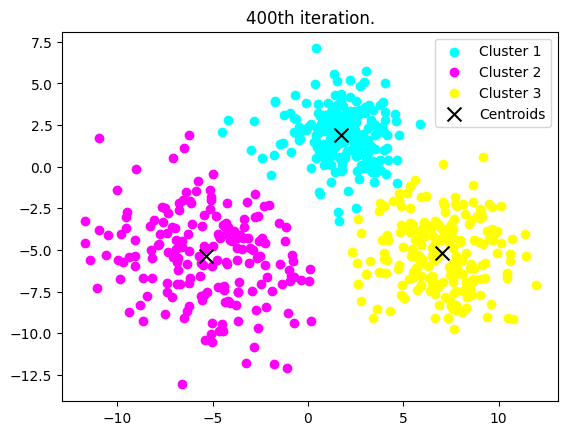

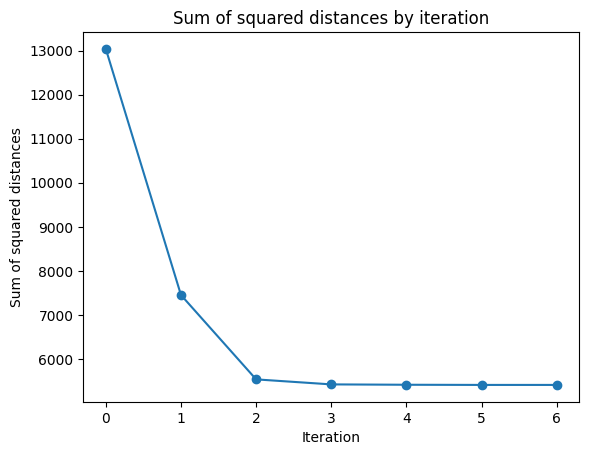

In [193]:
# Example
data = X
K = 3
iterations = [100, 200, 300, 400]
epsilon = 1e-5

# Initialize centroids
centroids = initialize_centroids(data, K)

# Variables to track convergence and sum of squared distances
converged = False
iter_count = 0
sum_distances_squared = []

# Plot clusters and centroids at different stages during training
cluster_labels = assign_points(data, centroids)
plot_clusters(data, centroids, cluster_labels, K, 0)

# Main loop of the K-means
for i in iterations:
    while not converged and iter_count < i:
        cluster_labels = assign_points(data, centroids)
        new_centroids = update_centroids(data, cluster_labels, K)

        if np.allclose(centroids, new_centroids, atol=epsilon):
            converged = True
        else:
            centroids = new_centroids

        sum_distance_squared = calculate_sum_distances_squared(data, centroids, cluster_labels, K)
        sum_distances_squared.append(sum_distance_squared)     
        iter_count += 1

    # Plot clusters and centroids at different stages during training
    plot_clusters(data, centroids, cluster_labels, K, i)

# Plot the sum of squared distances in each iteration
plot_sum_distances_squared(sum_distances_squared)

# Show the figures
plt.show()